In [ ]:
# imports
import pandas as pd
import numpy as np
import statsmodels.graphics.mosaicplot as mplt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# load dataset
csv_file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(csv_file_path)

# Exploratory Data Analysis

In [ ]:
# Display the first few rows of the dataset
diabetes_data.head().T

,0,1,2,3,4
Age,40,58,41,45,60
Gender,Male,Male,Male,Male,Male
Polyuria,No,No,Yes,No,Yes
Polydipsia,Yes,No,No,No,Yes
sudden weight loss,No,No,No,Yes,Yes
weakness,Yes,Yes,Yes,Yes,Yes
Polyphagia,No,No,Yes,Yes,Yes
Genital thrush,No,No,No,Yes,No
visual blurring,No,Yes,No,No,Yes
Itching,Yes,No,Yes,Yes,Yes


In [ ]:
# Display column names
diabetes_data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
# Check for missing values
print("Missing Values:")
diabetes_data.isnull().sum()

Missing Values:


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

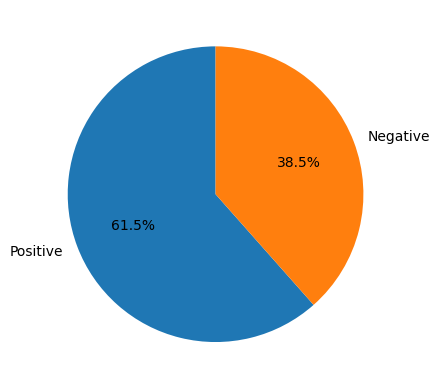

In [ ]:
diabetes_data['class'].value_counts()
plt.pie(diabetes_data['class'].value_counts(), labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle = 90)
plt.show()

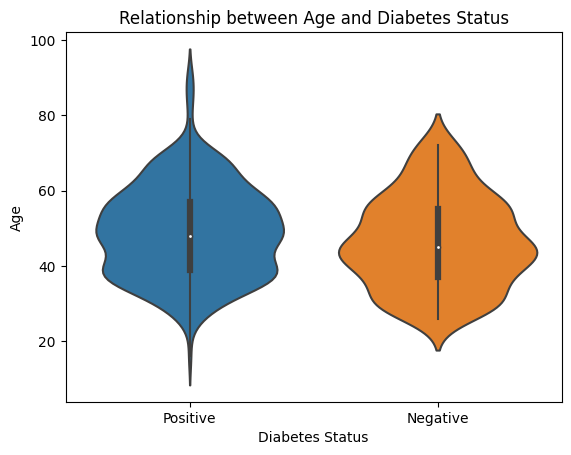

In [ ]:
sns.violinplot(x='class', y='Age', data=diabetes_data)
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.title('Relationship between Age and Diabetes Status')
plt.show()

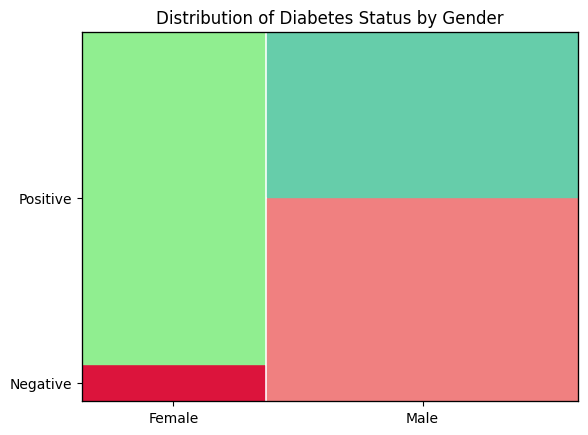

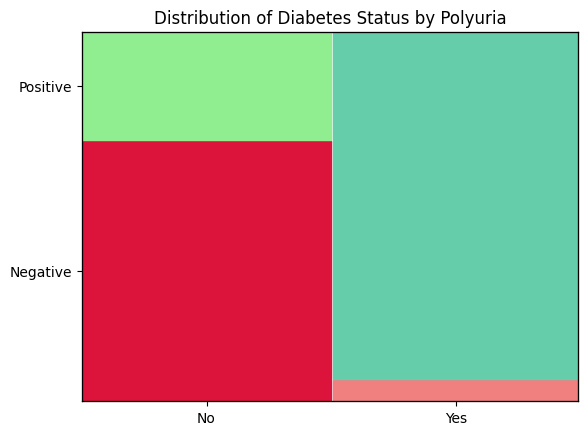

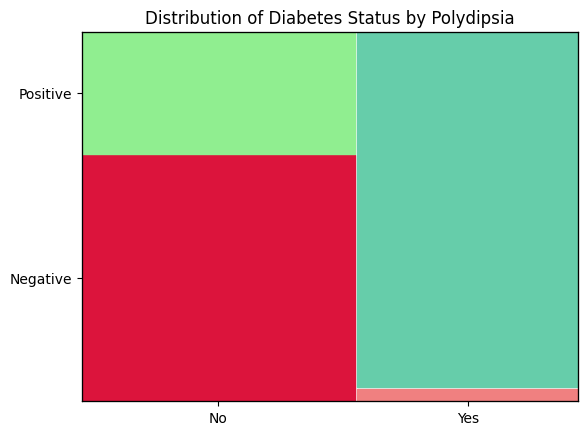

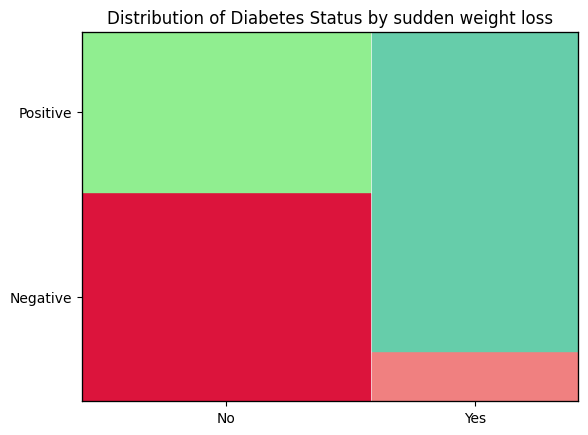

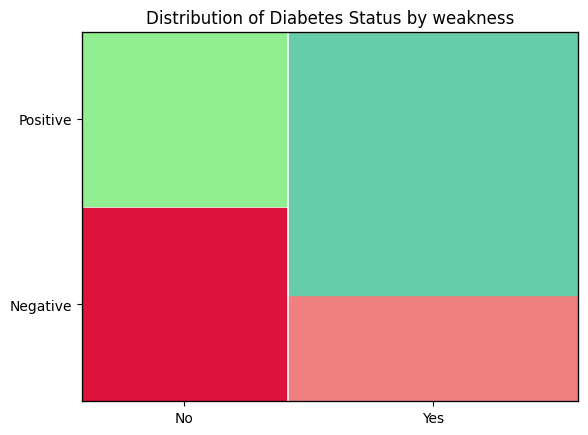

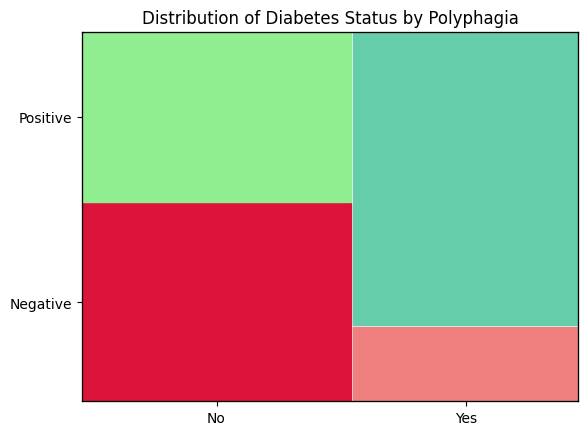

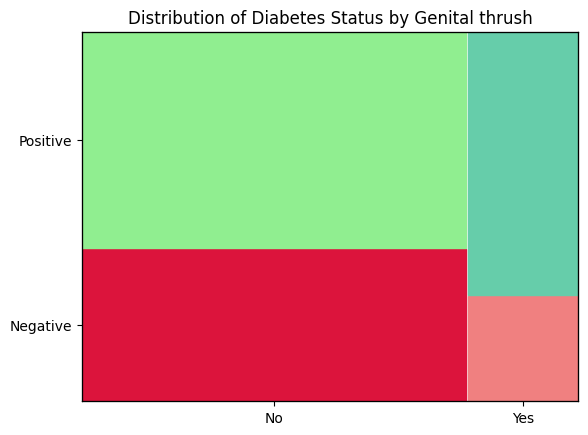

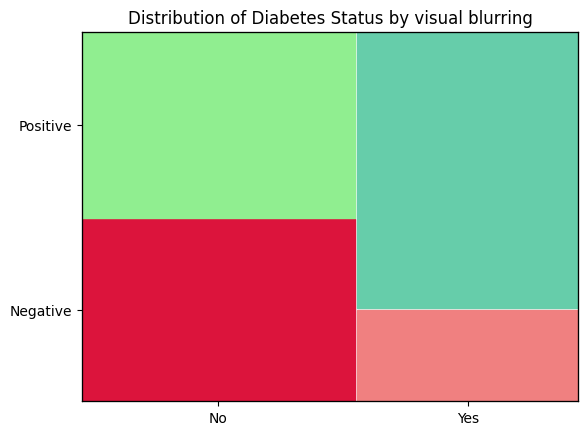

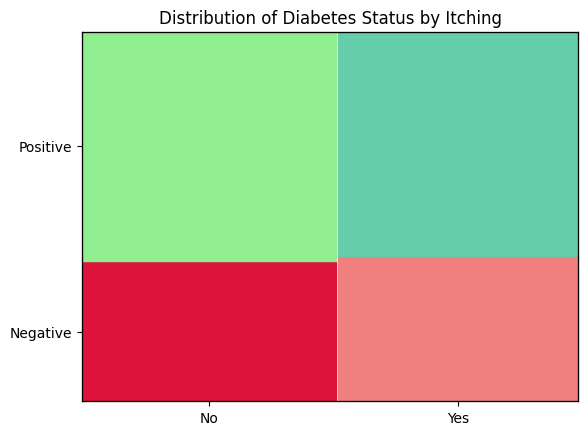

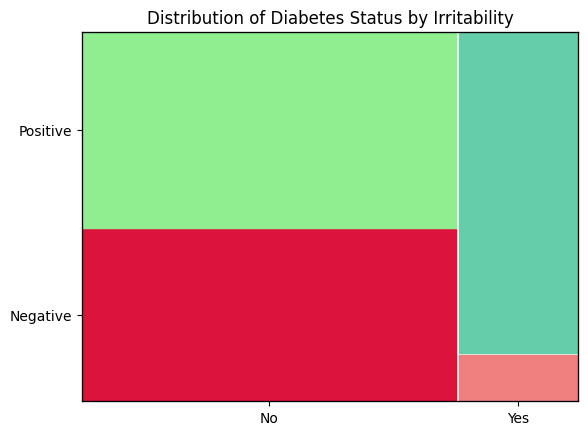

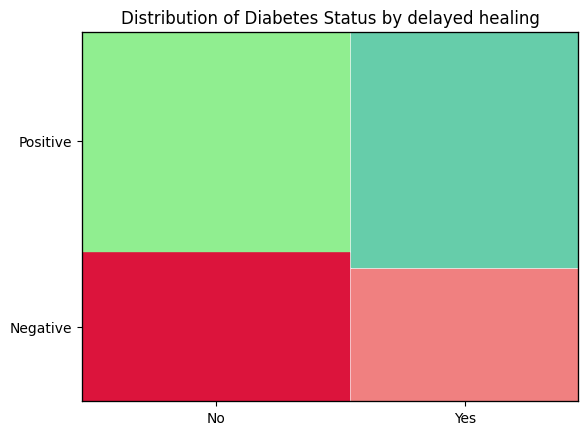

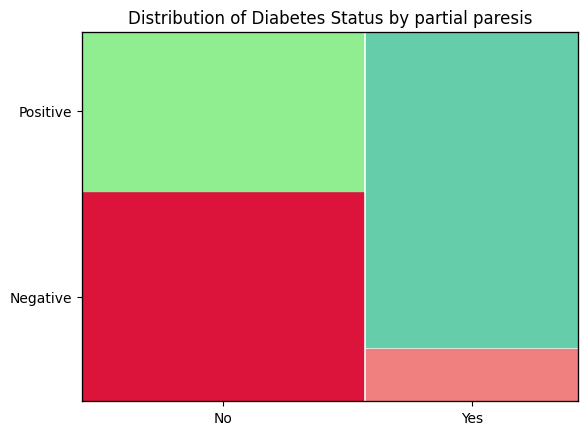

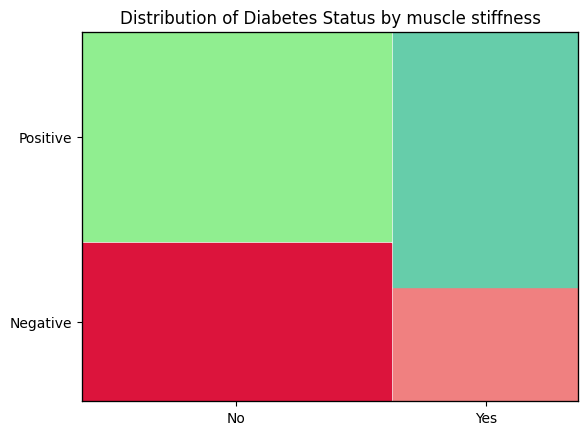

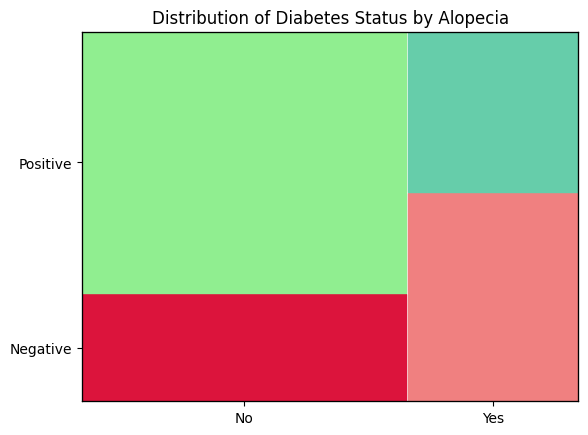

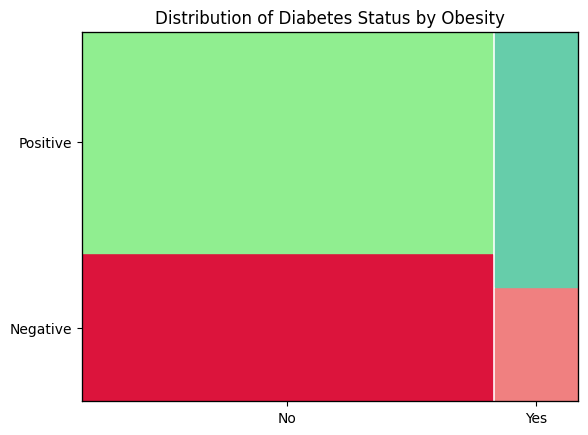

In [ ]:
features=diabetes_data.columns[1:-1]
for feature in features:
  vals=sorted(diabetes_data[feature].unique())
  props={}
  props[(vals[0], 'Negative')] = {'color' : 'crimson'}
  props[(vals[0], 'Positive')] = {'color' : 'lightgreen'}
  props[(vals[1], 'Negative')] = {'color' : 'lightcoral'}
  props[(vals[1], 'Positive')] = {'color' : 'mediumaquamarine'}
  mosaic_data = pd.crosstab(diabetes_data[feature], diabetes_data['class'])
  mplt.mosaic(mosaic_data.stack(), title='Distribution of Diabetes Status by {}'.format(feature), labelizer=lambda k: '', properties = props)
  plt.show()


In [ ]:
# Check data types
print("Data Types:")
print(diabetes_data.dtypes)


Data Types:
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


In [ ]:
# Convert categorical variables to numerical values (0 and 1)
label_encoder = LabelEncoder()
for feature in diabetes_data.columns[1:]:
  diabetes_data[feature] = label_encoder.fit_transform(diabetes_data[feature])


In [ ]:
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
# Check updated data types
print("Updated Data Types:")
print(diabetes_data.dtypes)


Updated Data Types:
Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


In [ ]:
# Check class distribution
print("Class Distribution:")
print(diabetes_data['class'].value_counts())

# processing done #

Class Distribution:
1    320
0    200
Name: class, dtype: int64


# Feature Selection

In [ ]:
# Correlation matrix
correlation_matrix = diabetes_data.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['class'].sort_values(ascending=False)
selected_features_corr = correlation_with_target[abs(correlation_with_target) > 0.1].index

# Display selected features based on correlation
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
Index(['class', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'partial paresis', 'Polyphagia', 'Irritability', 'visual blurring',
       'weakness', 'muscle stiffness', 'Genital thrush', 'Age', 'Alopecia',
       'Gender'],
      dtype='object')


<Axes: >

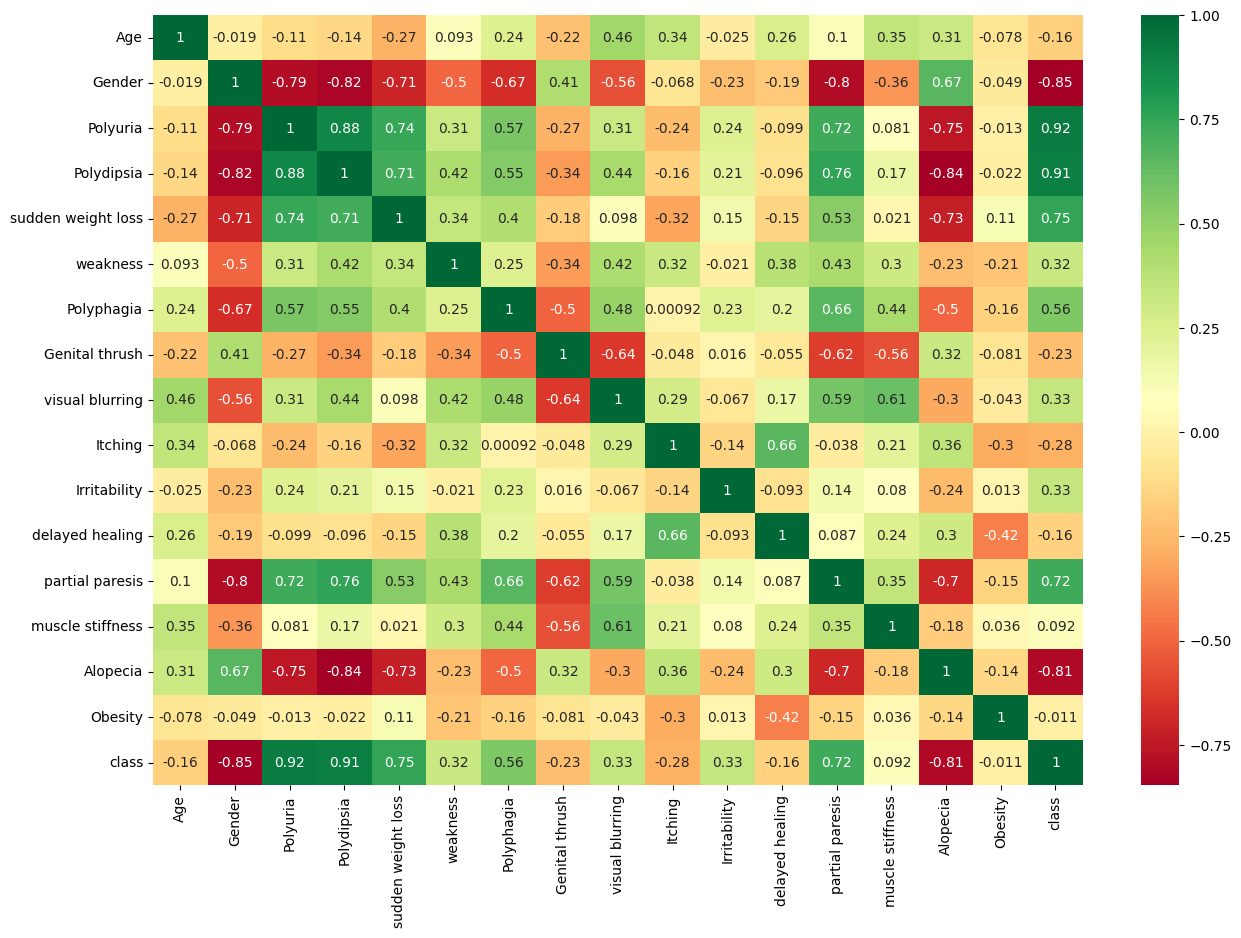

In [ ]:
# Plotting Correlation Matrix
plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Separate features and target variable
X = diabetes_data.drop('class', axis=1)
y = diabetes_data['class']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#Selecting 10 best features on the basis of chi-squared scores
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores_chi2 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_chi2.columns = ['Feature','Score']
print(featureScores_chi2.nlargest(10,'Score'))

               Feature       Score
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


In [ ]:
#Selecting 10 best features on the basis of f_classif scores
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores_f = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_f.columns = ['Feature','Score']
print(featureScores_f.nlargest(10,'Score'))

               Feature       Score
2             Polyuria  412.738410
3           Polydipsia  376.422649
1               Gender  130.968787
4   sudden weight loss  121.973731
12     partial paresis  119.046534
6           Polyphagia   68.841759
10        Irritability   51.030999
14            Alopecia   39.926590
8      visual blurring   34.917760
5             weakness   32.585064


In [ ]:
f_features=list(featureScores_f.nlargest(10,'Score')['Feature'])
chi2_features=list(featureScores_chi2.nlargest(10,'Score')['Feature'])
selected_features = list(set().union(f_features, chi2_features))
print("Selected Features: ", selected_features)

Selected Features:  ['Age', 'Polyuria', 'partial paresis', 'sudden weight loss', 'Irritability', 'visual blurring', 'Polydipsia', 'Gender', 'Alopecia', 'weakness', 'Polyphagia']


In [ ]:
# Using only selected features for X
X=diabetes_data[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Machine Learning Models

## Testing Several Models


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

import sklearn.metrics as metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [ ]:
models = [
    #("Linear Regression Classifier",LinearRegression()),
    ("Logistic Regression Classifier", LogisticRegression()),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=42)),
    ("Random Forest Classifier", RandomForestClassifier(random_state=42)),
    ("SVM Classifier", SVC(random_state=42)),
    ("K-Nearest Neighbors (KNN) Classifier", KNeighborsClassifier()),
    ("Gaussian Naive Bayes Classifier", GaussianNB()),
    #     ("XGBoost Classifier", XGBClassifier(random_state=42)),
    ("Multi-Layer Perceptron (MLP) Classifier", MLPClassifier(random_state=42)),
    ("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost Classifier", AdaBoostClassifier(random_state=42)),
    ("Ridge Classifier", RidgeClassifier(random_state=42)),
    ("SGD Classifier", SGDClassifier(random_state=42)),
    ("Linear Discriminant Analysis (LDA)", LinearDiscriminantAnalysis()),
    ("Quadratic Discriminant Analysis (QDA)", QuadraticDiscriminantAnalysis()),
    ("Bagging Classifier", BaggingClassifier(random_state=42)),
    ("Extra Trees Classifier", ExtraTreesClassifier(random_state=42)),
    (
        "HistGradient Boosting Classifier",
        HistGradientBoostingClassifier(random_state=42),
    ),
    (
        "Voting Classifier",
        VotingClassifier(
            estimators=[
                ("rf", RandomForestClassifier()),
                #         ('xgb', XGBClassifier())
            ]
        ),
    ),
    (
        "Stacking Classifier",
        StackingClassifier(
            estimators=[
                ("rf", RandomForestClassifier())
                #         ('xgb', XGBClassifier())
            ]
        ),
    ),
]

In [ ]:
# Iterate through classifiers and train, test, and display metrics
accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
y_pred_list = []

for model_name, model in models:
    # predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # append to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1score_list.append(f1)
    y_pred_list.append(y_pred)

    # print
    print(f"Classifier: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

Classifier: Logistic Regression Classifier
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


Classifier: Decision Tree Classifier
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


Classifier: Random Forest Classifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: SVM Classifier
Accuracy: 0.68
Precision: 0.47
Recall: 0.68
F1 Score: 0.55


Classifier: K-Nearest Neighbors (KNN) Classifier
Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1 Score: 0.88


Classifier: Gaussian Naive Bayes Classifier
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Multi-Layer Perceptron (MLP) Classifier
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


Classifier: Gradient Boosting Classifier
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Classifier: AdaBoost Classifier
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.90


Classifier: Ridge Classifier
Accuracy: 0.83
Precision: 0.85
Recall: 0.83
F1 Score: 0.83


Classifier: SGD Classifier
Accuracy: 0.74
Precision: 0.83
Recall: 0.74
F1 Score: 0.75


Classifier: Linear Discriminant Analysis (LDA)
Accuracy: 0.83
Precision: 0.85
Recall: 0.83
F1 Score: 0.83


Classifier: Quadratic Discriminant Analysis (QDA)
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


Classifier: Bagging Classifier
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Classifier: Extra Trees Classifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


Classifier: HistGradient Boosting Classifier
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.96


C

In [ ]:
model_name=""Random Forest Classifier", RandomForestClassifier(random_state=42)"
model=LinearRegression()

# predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# standardize
for i,pred in enumerate(y_pred):
  if pred<0.5:
    y_pred[i]=0
  else:
    y_pred[i]=1

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# append to lists
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1score_list.append(f1)
y_pred_list.append(y_pred)

# print
print(f"Classifier: {model_name}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\n")

Classifier: Classifier: Linear Regression
Accuracy: 0.83
Precision: 0.85
Recall: 0.83
F1 Score: 0.83




Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Separate features and target variable
X = diabetes_data.drop('class', axis=1)
y = diabetes_data['class']

# Perform RFE
rfe = RFE(rf_classifier, n_features_to_select=10)
# Fit RFE to the data
rfe.fit(X, y)

# Filter the dataset with selected features
selected_features_rfe = X.columns[rfe.support_]

# Display selected features based on RFE
print("Selected Features based on RFE:")
print(selected_features_rfe)


Selected Features based on RFE:
Index(['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'Irritability',
       'delayed healing', 'partial paresis', 'Alopecia', 'Gender_Female',
       'Gender_Male'],
      dtype='object')


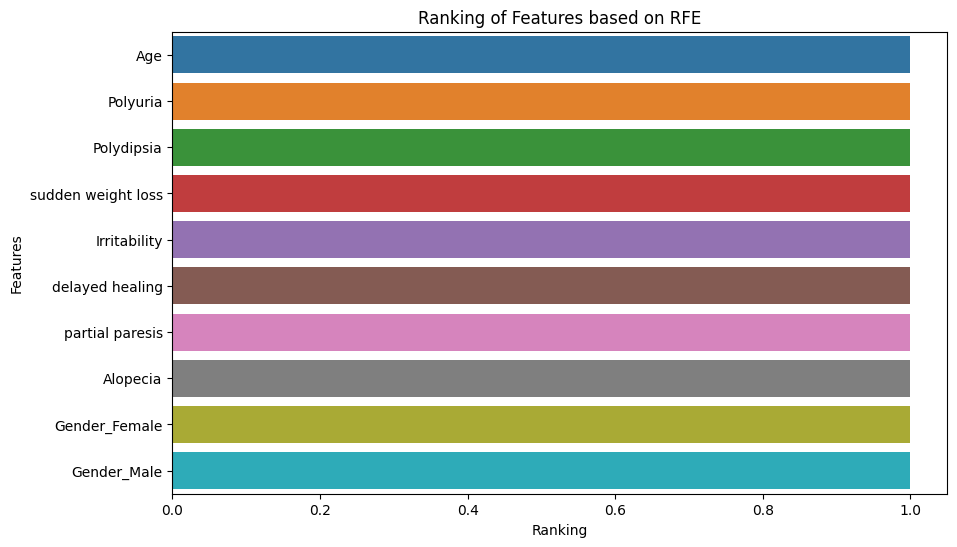

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for selected features
plt.figure(figsize=(10, 6))
sns.barplot(x=rfe.ranking_, y=X.columns, order=selected_features_rfe)
plt.title('Ranking of Features based on RFE')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()


Feature Engineering:
    Combine features to create interaction terms.

In [ ]:
# Example: Interaction feature between 'Polyuria' and 'Polydipsia'
diabetes_data['Polyuria_Polydipsia'] = diabetes_data['Polyuria'] * diabetes_data['Polydipsia']


In [ ]:
# Example: Age binning
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-Aged', 'Old']
diabetes_data['Age_Group'] = pd.cut(diabetes_data['Age'], bins=bins, labels=labels, right=False)


In [ ]:
# Example: Creating a feature based on medical knowledge
# If a person has both 'Polyuria' and 'Polydipsia', it might indicate a higher risk
diabetes_data['Polyuria_Polydipsia'] = diabetes_data['Polyuria'] & diabetes_data['Polydipsia']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target variable
X = diabetes_data.drop('class', axis=1)
y = diabetes_data['class']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.concat([X.drop(categorical_columns, axis=1), pd.DataFrame(encoder.fit_transform(X[categorical_columns]))], axis=1)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Example: Cross-validation with a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

ValueError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Example: Cross-validation with a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_encoded, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


ValueError: ignored